# This file is part of the first CA of CCT College Dublin student Illia Fadieiev

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("main_dataset.csv")

In [3]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [5]:
unique_age_groups = df['Age Group'].unique()
print(unique_age_groups)

['Under 1 year' '0 - 4 years' '0 - 14 years' '1 - 4 years' '5 - 9 years'
 '10 - 14 years' '15 - 19 years' '15 - 24 years' '15 years and over'
 '20 - 24 years' '25 - 29 years' '25 - 44 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '45 - 64 years'
 '50 - 54 years' '55 - 59 years' '60 - 64 years' '65 - 69 years'
 '65 years and over' '70 - 74 years' '75 - 79 years' '80 - 84 years'
 '85 years and over' 'All ages']


In [12]:
selected_age_groups = ['Under 1 year', '1 - 4 years', '5 - 9 years',
 '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years',
 '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']
selected_age_groups


['Under 1 year',
 '1 - 4 years',
 '5 - 9 years',
 '10 - 14 years',
 '15 - 19 years',
 '20 - 24 years',
 '25 - 29 years',
 '30 - 34 years',
 '35 - 39 years',
 '40 - 44 years',
 '45 - 49 years',
 '50 - 54 years',
 '55 - 59 years',
 '60 - 64 years',
 '65 - 69 years',
 '70 - 74 years',
 '75 - 79 years',
 '80 - 84 years',
 '85 years and over']

In [19]:
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
filtered_df = filtered_by_age_groups_df[filtered_by_age_groups_df['Sex'].isin(["Both sexes"])]

In [20]:
filtered_df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1
12,Population Estimates (Persons in April),1950,5 - 9 years,Both sexes,Thousand,278.9
15,Population Estimates (Persons in April),1950,10 - 14 years,Both sexes,Thousand,262.1
18,Population Estimates (Persons in April),1950,15 - 19 years,Both sexes,Thousand,244.0


In [21]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

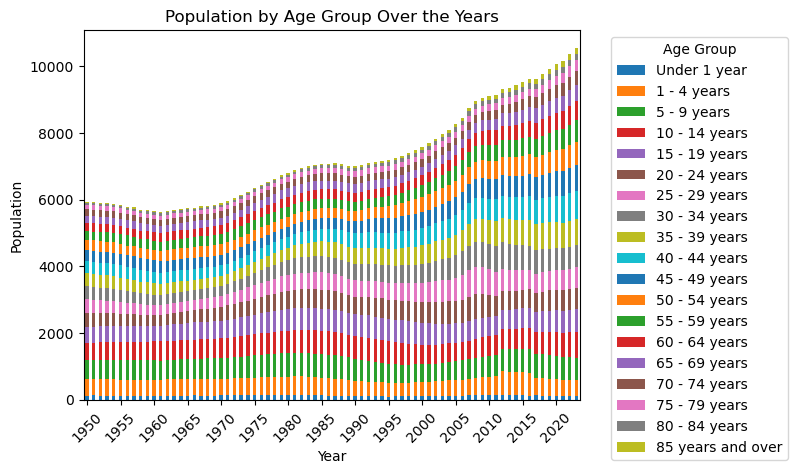

In [25]:
# Convert the "Age Group" column to a categorical data type with custom order
age_group_dtype = pd.CategoricalDtype(categories=selected_age_groups, ordered=True)
df['Age Group'] = df['Age Group'].astype(age_group_dtype)

# Group by 'Year' and 'Age Group', and sum the 'VALUE' column
grouped_df = df.groupby(['Year', 'Age Group'])['VALUE'].sum().reset_index()

# Pivot the DataFrame to have 'Year' as index, 'Age Group' as columns, and 'VALUE' as values
pivot_df = grouped_df.pivot(index='Year', columns='Age Group', values='VALUE')

# Plotting
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Age Group Over the Years')
plt.legend(title='Age Group')

# Set x-axis ticks for every 5-year interval
years = pivot_df.index
plt.xticks(range(0, len(years), 5), years[::5], rotation=45)

# Move the legend to the right of the graph
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()